# NFL Defense Data Nunnelee Notebook

This competition uses NFL’s Next Gen Stats data, which includes the position and speed of every player on the field during each play. We'll employ player tracking data for all drop-back pass plays from the 2018 regular season. The goal of submissions is to identify unique and impactful approaches to measure defensive performance on these plays. There are several different directions for participants to utilize —which may require levels of football savvy, data aptitude, and creativity. As examples:

* What are coverage schemes (man, zone, etc) that the defense employs? What coverage options tend to be better performing?
* Which players are the best at closely tracking receivers as they try to get open?
* Which players are the best at closing on receivers when the ball is in the air?
* Which players are the best at defending pass plays when the ball arrives?
* Is there any way to use player tracking data to predict whether or not certain penalties – for example, defensive pass interference – will be called?
* Who are the NFL’s best players against the pass?
* How does a defense react to certain types of offensive plays?
* Is there anything about a player – for example, their height, weight, experience, speed, or position – that can be used to predict their performance on defense?
* What does data tell us about defending the pass play?

# Evaulation
The challenge is to generate actionable, practical, and novel insights from player tracking data that corresponds to defensive backs. Suggestions made here represent some of the approaches that football coaches are currently thinking of, but there undoubtedly several others.

An entry to the competition consists of a Notebook submission that is evaluated on the following five components, where 0 is the low score and 10 is the high score.

Note: All notebooks submitted must be made public on or before the submission deadline to be eligible.

Open Competition: The first aim takes on what an NFL defense does once a quarterback drops back to pass. This includes coverage schemes (typically man versus zone), how players (often termed “secondary” defenders) disrupt and prevent the offense from completing passes, and how, once the ball is in the air, the defense works to ensure that a pass falls incomplete.

## Big Data Bowl 2021 scoring sheet
Submissions will be judged by the NFL based on how well they address:

Innovation:

Are the proposed findings actionable?
Is this a way of looking at tracking data that is novel?
Is this project creative?
Accuracy:

Is the work correct?
Are claims backed up by data?
Are the statistical models appropriate given the data?
Relevance:

Would NFL teams (or the league office) be able to use these results on a week-to-week basis?
Does the analysis account for variables that make football data complex?
Clarity:

Evaluate the writing with respect to how clear the writer(s) make findings.
Data visualization/tables:

Are the charts and tables provided accessible, interesting, visually appealing, and accurate?

Notebooks should consist of no more than 2,000 words and no more than 7 tables/figures. Submissions will not be penalized for any number of words or figures under this limit. Participants are encouraged to show statistical code if it helps readers better understand their analyses; most, if not all code, however, should be hidden in the Appendix.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2021/plays.csv
/kaggle/input/nfl-big-data-bowl-2021/week10.csv
/kaggle/input/nfl-big-data-bowl-2021/week4.csv
/kaggle/input/nfl-big-data-bowl-2021/week15.csv
/kaggle/input/nfl-big-data-bowl-2021/week3.csv
/kaggle/input/nfl-big-data-bowl-2021/week13.csv
/kaggle/input/nfl-big-data-bowl-2021/week1.csv
/kaggle/input/nfl-big-data-bowl-2021/week7.csv
/kaggle/input/nfl-big-data-bowl-2021/week12.csv
/kaggle/input/nfl-big-data-bowl-2021/week9.csv
/kaggle/input/nfl-big-data-bowl-2021/players.csv
/kaggle/input/nfl-big-data-bowl-2021/week5.csv
/kaggle/input/nfl-big-data-bowl-2021/week16.csv
/kaggle/input/nfl-big-data-bowl-2021/week17.csv
/kaggle/input/nfl-big-data-bowl-2021/week6.csv
/kaggle/input/nfl-big-data-bowl-2021/week8.csv
/kaggle/input/nfl-big-data-bowl-2021/week14.csv
/kaggle/input/nfl-big-data-bowl-2021/games.csv
/kaggle/input/nfl-big-data-bowl-2021/week2.csv
/kaggle/input/nfl-big-data-bowl-2021/week11.csv


In [2]:
df_week1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/week1.csv")
df_week1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986022 entries, 0 to 986021
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           986022 non-null  object 
 1   x              986022 non-null  float64
 2   y              986022 non-null  float64
 3   s              986022 non-null  float64
 4   a              986022 non-null  float64
 5   dis            986022 non-null  float64
 6   o              919109 non-null  float64
 7   dir            919109 non-null  float64
 8   event          986022 non-null  object 
 9   nflId          919109 non-null  float64
 10  displayName    986022 non-null  object 
 11  jerseyNumber   919109 non-null  float64
 12  position       919109 non-null  object 
 13  frameId        986022 non-null  int64  
 14  team           986022 non-null  object 
 15  gameId         986022 non-null  int64  
 16  playId         986022 non-null  int64  
 17  playDirection  986022 non-nul

In [3]:
df_games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/games.csv")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


In [4]:
df_players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/players.csv")
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [5]:
df_plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2021/plays.csv")
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [6]:
df_week1.head().T

,0,1,2,3,4
time,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z,2018-09-07T01:07:14.599Z
x,91.73,88.89,91.35,86.31,90.78
y,26.67,36.47,44.16,22.01,36.15
s,0,0.01,0.02,0.09,0
a,0.01,0.01,0.03,0.42,0
dis,0.02,0.01,0.01,0.01,0
o,289.57,105.63,290.45,70.12,257.61
dir,240.93,66.66,16.86,168.91,193.97
event,None,None,None,None,None
nflId,310,79848,2.49545e+06,2.49561e+06,2.53304e+06


In [7]:
df_players.head().T

,0,1,2,3,4
nflId,2539334,2539653,2543850,2555162,2555255
height,72,70,69,73,75
weight,190,186,186,227,232
birthDate,1990-09-10,1988-11-01,1991-12-18,1994-11-04,1993-07-01
collegeName,Washington,Southeastern Louisiana,Purdue,Louisiana State,Minnesota
position,CB,CB,SS,MLB,OLB
displayName,Desmond Trufant,Robert Alford,Ricardo Allen,Deion Jones,De'Vondre Campbell


In [8]:
df_games.head().T

,0,1,2,3,4
gameId,2018090600,2018090901,2018090902,2018090903,2018090900
gameDate,09/06/2018,09/09/2018,09/09/2018,09/09/2018,09/09/2018
gameTimeEastern,20:20:00,13:00:00,13:00:00,13:00:00,13:00:00
homeTeamAbbr,PHI,CLE,IND,MIA,BAL
visitorTeamAbbr,ATL,PIT,CIN,TEN,BUF
week,1,1,1,1,1


In [9]:
df_plays.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,ATL,ATL,ATL,ATL,ATL
playType,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass
yardlineSide,ATL,PHI,PHI,PHI,PHI
yardlineNumber,20,39,39,39,1


## The only database that has a play result is the "plays" database. The other data seems irrelevant as to whether a defense successfully completes the pass.

### That's what we'll move forward with. This is a multiple regression problem, with multiple data catergories, objects, floats, integers, and bools. We'll need to change them all into numeric value to utilize a machine learning regression model.

In [10]:
# Check for missing data
df_plays.isnull().sum()/len(df_plays)

gameId                    0.000000
playId                    0.000000
playDescription           0.000000
quarter                   0.000000
down                      0.000000
yardsToGo                 0.000000
possessionTeam            0.000000
playType                  0.000000
yardlineSide              0.013202
yardlineNumber            0.000000
offenseFormation          0.007329
personnelO                0.001507
defendersInTheBox         0.003223
numberOfPassRushers       0.032902
personnelD                0.001507
typeDropback              0.033214
preSnapVisitorScore       0.033214
preSnapHomeScore          0.033214
gameClock                 0.033214
absoluteYardlineNumber    0.033214
penaltyCodes              0.937315
penaltyJerseyNumbers      0.937315
passResult                0.000104
offensePlayResult         0.000000
playResult                0.000000
epa                       0.000000
isDefensivePI             0.000000
dtype: float64

In [11]:
# penaltyCodes and penaltyJerseyNumbers have a high percentage of misssing values. I'm going to drop those columns and create a new database.
df_plays2 = df_plays.drop(["penaltyCodes", "penaltyJerseyNumbers"], axis=1)
df_plays2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [12]:
df_plays2.isnull().sum()/len(df_plays2)

gameId                    0.000000
playId                    0.000000
playDescription           0.000000
quarter                   0.000000
down                      0.000000
yardsToGo                 0.000000
possessionTeam            0.000000
playType                  0.000000
yardlineSide              0.013202
yardlineNumber            0.000000
offenseFormation          0.007329
personnelO                0.001507
defendersInTheBox         0.003223
numberOfPassRushers       0.032902
personnelD                0.001507
typeDropback              0.033214
preSnapVisitorScore       0.033214
preSnapHomeScore          0.033214
gameClock                 0.033214
absoluteYardlineNumber    0.033214
passResult                0.000104
offensePlayResult         0.000000
playResult                0.000000
epa                       0.000000
isDefensivePI             0.000000
dtype: float64

In [13]:
# Find the columns wich contain strings
for label, content in df_plays2.items():
    if pd.api.types.is_string_dtype(content):
        df_plays2[label] = content.astype("category").cat.as_ordered()

df_plays2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gameId                  19239 non-null  int64   
 1   playId                  19239 non-null  int64   
 2   playDescription         19239 non-null  category
 3   quarter                 19239 non-null  int64   
 4   down                    19239 non-null  int64   
 5   yardsToGo               19239 non-null  int64   
 6   possessionTeam          19239 non-null  category
 7   playType                19239 non-null  category
 8   yardlineSide            18985 non-null  category
 9   yardlineNumber          19239 non-null  int64   
 10  offenseFormation        19098 non-null  category
 11  personnelO              19210 non-null  category
 12  defendersInTheBox       19177 non-null  float64 
 13  numberOfPassRushers     18606 non-null  float64 
 14  personnelD            

In [14]:
# Check the missing data
df_plays2.isna().sum()

gameId                      0
playId                      0
playDescription             0
quarter                     0
down                        0
yardsToGo                   0
possessionTeam              0
playType                    0
yardlineSide              254
yardlineNumber              0
offenseFormation          141
personnelO                 29
defendersInTheBox          62
numberOfPassRushers       633
personnelD                 29
typeDropback              639
preSnapVisitorScore       639
preSnapHomeScore          639
gameClock                 639
absoluteYardlineNumber    639
passResult                  2
offensePlayResult           0
playResult                  0
epa                         0
isDefensivePI               0
dtype: int64

In [15]:
# Let's fill the numeric rows with the median

for label, content in df_plays2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_plays2[label] = content.fillna(content.median())

In [16]:
# Let's check if numeric values are filled
df_plays2.isna().sum()

gameId                      0
playId                      0
playDescription             0
quarter                     0
down                        0
yardsToGo                   0
possessionTeam              0
playType                    0
yardlineSide              254
yardlineNumber              0
offenseFormation          141
personnelO                 29
defendersInTheBox           0
numberOfPassRushers         0
personnelD                 29
typeDropback              639
preSnapVisitorScore         0
preSnapHomeScore            0
gameClock                 639
absoluteYardlineNumber      0
passResult                  2
offensePlayResult           0
playResult                  0
epa                         0
isDefensivePI               0
dtype: int64

## Fill and change categorical variables into numbers

In [17]:
for label, content in df_plays2.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_plays2[label] = pd.Categorical(content).codes+1

In [18]:
df_plays2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  int16  
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  int8   
 7   playType                19239 non-null  int8   
 8   yardlineSide            19239 non-null  int8   
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19239 non-null  int8   
 11  personnelO              19239 non-null  int8   
 12  defendersInTheBox       19239 non-null  float64
 13  numberOfPassRushers     19239 non-null  float64
 14  personnelD              19239 non-null

In [19]:
df_plays2.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,5692,3553,3469,3392,1093
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,2,2,2,2,2
playType,1,1,1,1,1
yardlineSide,2,26,26,26,26
yardlineNumber,20,39,39,39,1


# Split our data into X (data) and y(target)

In [20]:
X = df_plays2.drop("playResult", axis=1)

y = df_plays2["playResult"]

In [21]:
# Lets split the data into training and test sets

train_X = X[:80]
train_y = y[:80]

test_X = X[80:]
test_y = y[80:]


# Modelling Linear Regression

In [22]:
from sklearn import linear_model

In [23]:
# Let's train the model first

regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)

regr.score(train_X, train_y)

0.9368817995049556

In [24]:
test_X.isna().sum()

gameId                    0
playId                    0
playDescription           0
quarter                   0
down                      0
yardsToGo                 0
possessionTeam            0
playType                  0
yardlineSide              0
yardlineNumber            0
offenseFormation          0
personnelO                0
defendersInTheBox         0
numberOfPassRushers       0
personnelD                0
typeDropback              0
preSnapVisitorScore       0
preSnapHomeScore          0
gameClock                 0
absoluteYardlineNumber    0
passResult                0
offensePlayResult         0
epa                       0
isDefensivePI             0
dtype: int64

In [27]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19159 entries, 80 to 19238
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19159 non-null  int64  
 1   playId                  19159 non-null  int64  
 2   playDescription         19159 non-null  int16  
 3   quarter                 19159 non-null  int64  
 4   down                    19159 non-null  int64  
 5   yardsToGo               19159 non-null  int64  
 6   possessionTeam          19159 non-null  int8   
 7   playType                19159 non-null  int8   
 8   yardlineSide            19159 non-null  int8   
 9   yardlineNumber          19159 non-null  int64  
 10  offenseFormation        19159 non-null  int8   
 11  personnelO              19159 non-null  int8   
 12  defendersInTheBox       19159 non-null  float64
 13  numberOfPassRushers     19159 non-null  float64
 14  personnelD              19159 non-nul

In [28]:
# 94% accurate. Let's check the test set
regr.fit(test_X, test_y)

regr.score(test_X, test_y)

0.9070567941704457

In [29]:
# Make a correlation matrix
df_plays2.corr()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,passResult,offensePlayResult,playResult,epa,isDefensivePI
gameId,1.000000,0.003860,-0.000294,-0.011807,0.014600,0.011798,0.010160,0.007923,0.013795,0.013766,...,-0.027440,-0.069387,-0.035054,0.000013,0.010452,0.009677,-0.019115,-0.020257,-0.011386,0.005246
playId,0.003860,1.000000,0.126269,0.955037,0.013178,0.012832,-0.029372,0.008951,-0.017543,-0.001816,...,0.013888,0.690635,0.688098,-0.246190,0.001334,0.023067,-0.012455,-0.012120,-0.018480,0.005769
playDescription,-0.000294,0.126269,1.000000,0.000401,0.000707,-0.008427,-0.002975,0.000552,-0.013974,-0.030136,...,0.010743,0.090893,0.080383,-0.493191,0.022558,0.018412,-0.016877,-0.016689,-0.003017,-0.004102
quarter,-0.011807,0.955037,0.000401,1.000000,0.021050,0.015270,-0.019853,0.009716,-0.005980,-0.000274,...,0.009888,0.644295,0.639407,-0.018279,0.001945,0.019891,-0.009974,-0.011267,-0.019915,0.003582
down,0.014600,0.013178,0.000707,0.021050,1.000000,-0.276123,0.005840,0.069637,0.000978,-0.020232,...,0.001996,-0.013577,-0.008049,0.010022,0.002799,0.100143,-0.063911,-0.066480,-0.056965,0.014154
yardsToGo,0.011798,0.012832,-0.008427,0.015270,-0.276123,1.000000,-0.008848,-0.019453,-0.003019,0.066594,...,0.034622,0.010569,0.004395,0.020465,-0.002536,-0.017233,0.040389,0.039519,-0.092148,-0.012971
possessionTeam,0.010160,-0.029372,-0.002975,-0.019853,0.005840,-0.008848,1.000000,0.004408,0.538337,-0.012864,...,-0.002564,0.020158,-0.018104,0.007766,0.029239,-0.005230,0.021195,0.017205,0.013790,-0.000607
playType,0.007923,0.008951,0.000552,0.009716,0.069637,-0.019453,0.004408,1.000000,0.005559,0.001192,...,-0.640257,-0.025736,-0.032088,-0.215298,-0.000242,0.565113,-0.265803,-0.174054,-0.079825,0.467930
yardlineSide,0.013795,-0.017543,-0.013974,-0.005980,0.000978,-0.003019,0.538337,0.005559,1.000000,-0.055628,...,-0.008859,0.022639,-0.018926,0.012883,0.009254,0.000143,0.012782,0.012591,0.009222,0.004732
yardlineNumber,0.013766,-0.001816,-0.030136,-0.000274,-0.020232,0.066594,-0.012864,0.001192,-0.055628,1.000000,...,0.036766,-0.002223,0.020321,0.013806,0.004626,0.001041,0.072679,0.074692,-0.036261,-0.003291


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(25.5, -0.5)

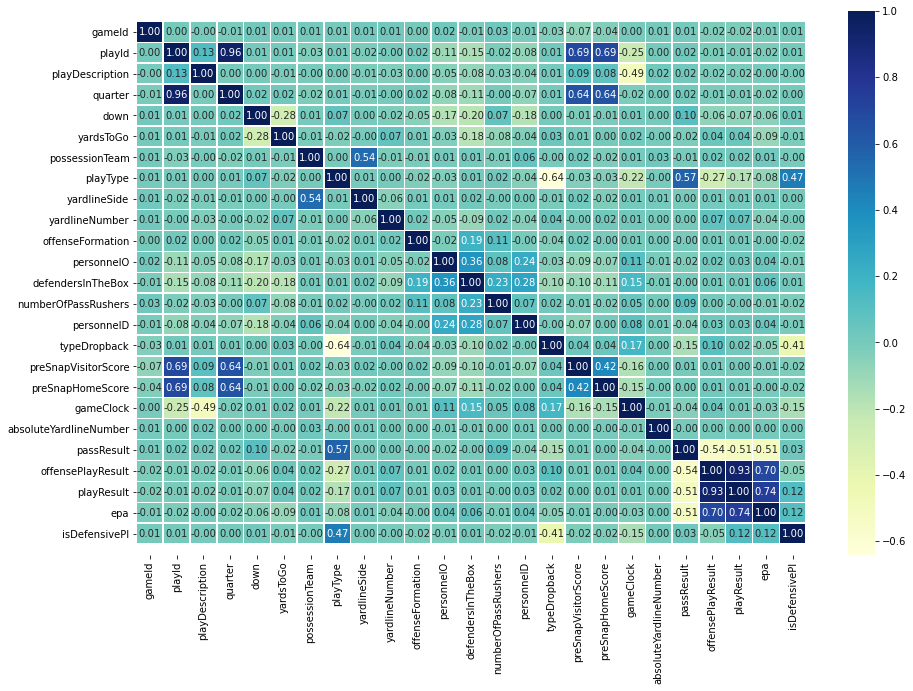

In [33]:
# Graph it
corr_matrix =df_plays2.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)                 

## According to our correlation matrix, the top 2 criteria that impacts our playResult are offensePlayResult and epa. 